US Vehicle Sales

In [1]:
import pandas as pd
import streamlit as st
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vehicles = pd.read_csv('C:/Users/Hongyu Jin/python/PracticumProject4/vehicles_us.csv')
vehicles['manufacturer'] = vehicles['model'].str.split().str[0]
vehicles['model_year'] = vehicles['model_year'].fillna(1900).astype(np.int64)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 5.5+ MB


In [31]:
def model_period(year):
    if 1900 <= year <= 1920:
        return '1900-1920'
    if 1920 < year <= 1940:
        return '1921-1940'
    if 1940 < year <= 1960:
        return '1941-1960'
    if 1960 < year <= 1980:
        return '1961-1980'
    if 1980 < year <= 2000:
        return '1981-2000'
    if 2000 < year <= 2020:
        return '2001-2020'

#print(vehicles['model_year'].min(), vehicles['model_year'].max())
vehicles['model_period'] = vehicles['model_year'].apply(model_period)
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good        6.0  gas  145000.0   
1  25500        1900      ford f-150       good        6.0  gas   88705.0   
2   5500        2013  hyundai sonata   like new        4.0  gas  110000.0   
3   1500        2003      ford f-150       fair        8.0  gas       NaN   
4  14900        2017    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
4    automatic   sedan       black     NaN  2019-04-02           28   

  manufacturer model_period  
0          bmw    2001-2020  
1         ford    1900-1920  
2      hyundai    20

In [4]:
print(vehicles['price'].min(), vehicles['price'].max())
print(vehicles['price'].value_counts())

1 375000
1        798
6995     719
5995     655
4995     624
3500     620
        ... 
58500      1
3993       1
32987      1
3744       1
7455       1
Name: price, Length: 3443, dtype: int64


In [5]:
print(vehicles['manufacturer'].unique())
#print(vehicles['model'].unique())

['bmw' 'ford' 'hyundai' 'chrysler' 'toyota' 'honda' 'kia' 'chevrolet'
 'ram' 'gmc' 'jeep' 'nissan' 'subaru' 'dodge' 'mercedes-benz' 'acura'
 'cadillac' 'volkswagen' 'buick']


In [8]:
print(vehicles['type'].unique())
print(vehicles['transmission'].unique())
print(vehicles['condition'].unique())
print(vehicles['fuel'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']
['automatic' 'manual' 'other']
['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
['gas' 'diesel' 'other' 'hybrid' 'electric']


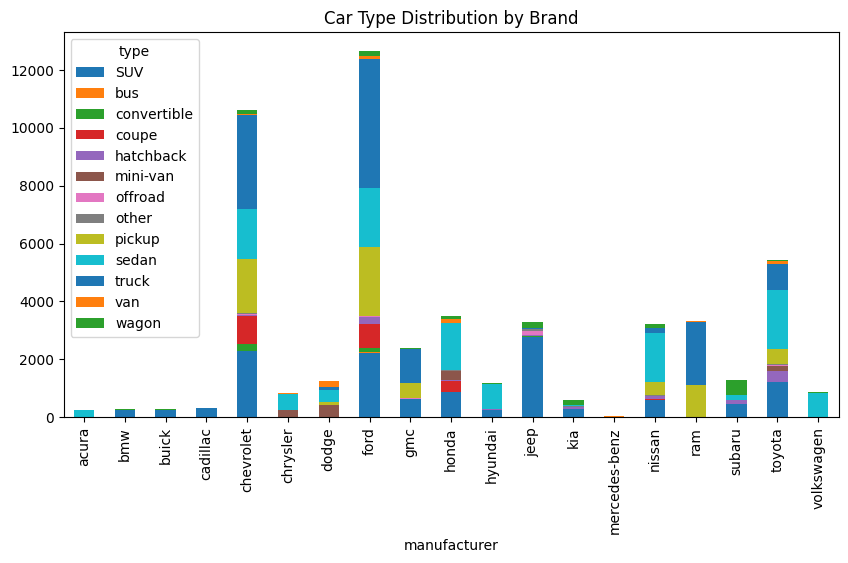

In [9]:
brand_by_type = pd.pivot_table(vehicles, values='price', index='manufacturer', columns='type', aggfunc='count')
#print(brand_by_type)
brand_by_type.plot(kind='bar', stacked=True, title='Car Type Distribution by Brand', figsize=[10, 5])
plt.show()

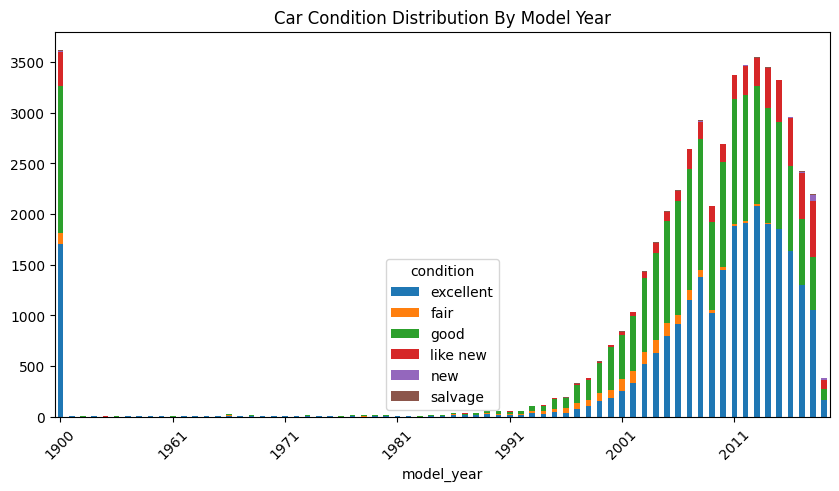

In [10]:
mdyr_by_condition = pd.pivot_table(vehicles, values='price', index='model_year', columns='condition', aggfunc='count')
#print(mdyr_by_condition)
mdyr_by_condition.plot(kind='bar', stacked=True, title='Car Condition Distribution By Model Year', figsize=[10, 5])
plt.xticks(np.arange(0, 69, 10), rotation=45)
plt.show()

In [30]:
brand1 = 'bmw'
brand2 = 'cadillac'
brand1_vehicles = vehicles[vehicles['manufacturer'] == brand1]
brand2_vehicles = vehicles[vehicles['manufacturer'] == brand2]

colors = ['#1f77b4', '#c23e3e']
fig1 = px.histogram(brand1_vehicles, x='price', color_discrete_sequence=[colors[0]], opacity=0.8, nbins=20)
fig2 = px.histogram(brand2_vehicles, x='price', color_discrete_sequence=[colors[1]], opacity=0.5, nbins=20)
fig_combined = fig1.add_trace(fig2.data[0])
fig_combined.update_layout(barmode='overlay', xaxis_title='Price', yaxis_title='Count',
                            title='Price Distribution by Brand', width=1000, height=600)
fig_combined.show()

In [29]:
fig = px.scatter(vehicles, x="model_year", y="price", color='condition', 
                 color_discrete_sequence=px.colors.sequential.Viridis, width=1000, height=600)
fig.show()